In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 


y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

C:\Users\unaiz\AppData\Local\Temp\ipykernel_15728\2628873864.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


gnb = GaussianNB()
gnb.fit(X_train, np.ravel(y_train))

y_pred_whole = gnb.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_whole = confusion_matrix(y_test, y_pred_whole)

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
X_train_selected = selector.fit_transform(X_train, np.ravel(y_train))
X_test_selected = selector.transform(X_test)


gnb_univariate = GaussianNB()
gnb_univariate.fit(X_train_selected, np.ravel(y_train))


# Generate confusion matrix
y_pred_univariate = gnb_univariate.predict(X_test_selected)
cm_univariate = confusion_matrix(y_test, y_pred_univariate)




from sklearn.feature_selection import mutual_info_classif
import pandas as pd
mi = mutual_info_classif(X_train, np.ravel(y_train))

# Sort the features based on MI scores
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Select top 10 features
top_features = mi_scores.index[:3]  # Select the top 10 based on MI

# Reduce the training and testing sets to these features
df_aux_train = pd.DataFrame(X_train, columns=X.columns.to_list())
df_aux_train_top = df_aux_train[top_features]
X_train_top = df_aux_train_top.to_numpy()

df_aux_test = pd.DataFrame(X_test, columns=X.columns.to_list())
df_aux_test_top = df_aux_test[top_features]
X_test_top = df_aux_test_top.to_numpy()

gnb_mi = GaussianNB()
gnb_mi.fit(X_train_top, np.ravel(y_train))



# Generate confusion matrix
y_pred_mi = gnb_mi.predict(X_test_top)
cm_mi = confusion_matrix(y_test, y_pred_mi)






from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator= RandomForestClassifier() , n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train, np.ravel(y_train))
X_test_rfe = rfe.transform(X_test)

gnb_rfe = GaussianNB()
gnb_rfe.fit(X_train_rfe, np.ravel(y_train))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
y_pred_rfe = gnb_rfe.predict(X_test_rfe)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_whole))
print(roc_auc_score(y_test, y_pred_whole))

print(classification_report(y_test, y_pred_univariate))
print(roc_auc_score(y_test, y_pred_univariate))

print(classification_report(y_test, y_pred_mi))
print(roc_auc_score(y_test, y_pred_mi))

print(classification_report(y_test, y_pred_rfe))
print(roc_auc_score(y_test, y_pred_rfe))



              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

0.9292328042328042
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9623015873015873
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96   

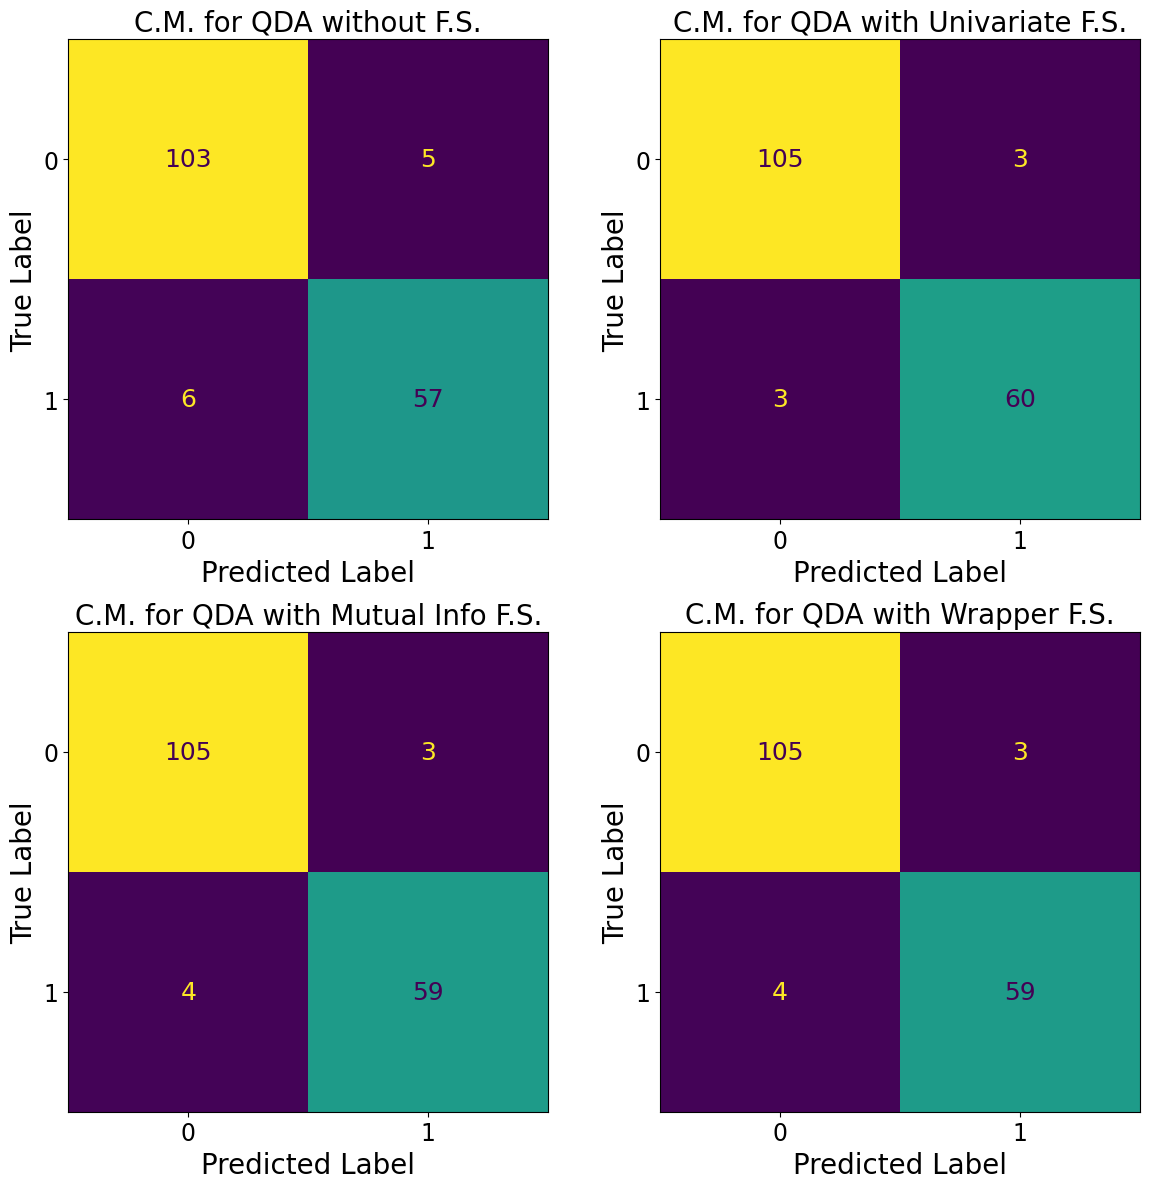

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid with increased figure size

# Set a common font size for titles, labels, and annotations
title_fontsize = 20
label_fontsize = 17
annotation_fontsize = 18
axis_label_fontsize = 20

# Plot each confusion matrix on a separate subplot
disp_whole = ConfusionMatrixDisplay(confusion_matrix=cm_whole)
disp_whole.plot(ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title("C.M. for GNB without F.S.", fontsize=title_fontsize)
axes[0, 0].set_xlabel("Predicted Label", fontsize=axis_label_fontsize)
axes[0, 0].set_ylabel("True Label", fontsize=axis_label_fontsize)
axes[0, 0].tick_params(axis='both', which='major', labelsize=label_fontsize)

disp_univariate = ConfusionMatrixDisplay(confusion_matrix=cm_univariate)
disp_univariate.plot(ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title("C.M. for GNB with Univariate F.S.", fontsize=title_fontsize)
axes[0, 1].set_xlabel("Predicted Label", fontsize=axis_label_fontsize)
axes[0, 1].set_ylabel("True Label", fontsize=axis_label_fontsize)
axes[0, 1].tick_params(axis='both', which='major', labelsize=label_fontsize)

disp_mi = ConfusionMatrixDisplay(confusion_matrix=cm_mi)
disp_mi.plot(ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title("C.M. for GNB with Mutual Info F.S.", fontsize=title_fontsize)
axes[1, 0].set_xlabel("Predicted Label", fontsize=axis_label_fontsize)
axes[1, 0].set_ylabel("True Label", fontsize=axis_label_fontsize)
axes[1, 0].tick_params(axis='both', which='major', labelsize=label_fontsize)

disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe)
disp_rfe.plot(ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title("C.M. for GNB with Wrapper F.S.", fontsize=title_fontsize)
axes[1, 1].set_xlabel("Predicted Label", fontsize=axis_label_fontsize)
axes[1, 1].set_ylabel("True Label", fontsize=axis_label_fontsize)
axes[1, 1].tick_params(axis='both', which='major', labelsize=label_fontsize)

# Make annotation fonts larger
for disp in [disp_whole, disp_univariate, disp_mi, disp_rfe]:
    for text in disp.text_.ravel():  # Access and set the font size of each cell annotation
        text.set_fontsize(annotation_fontsize)

# Adjust layout and display
plt.tight_layout()
plt.show()


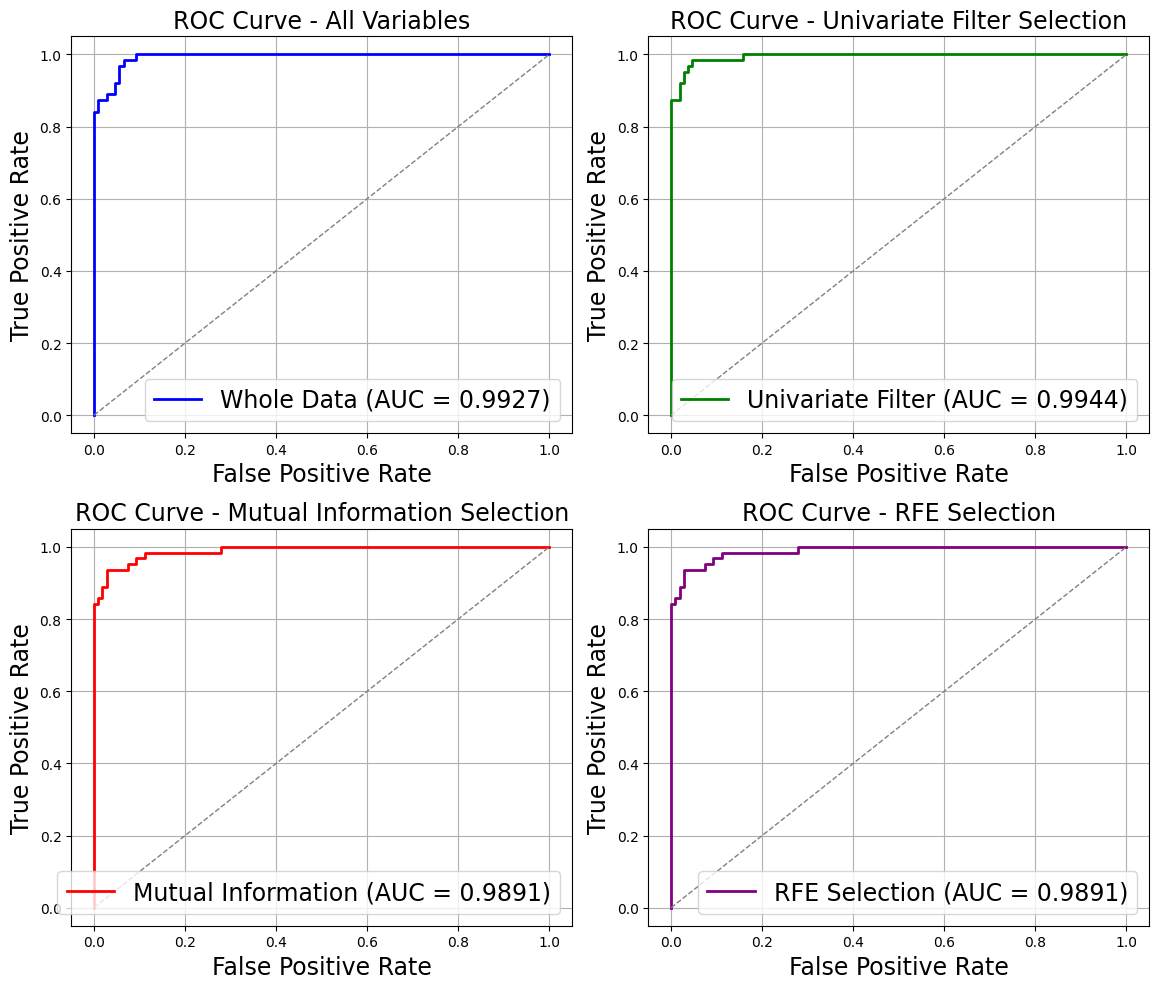

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Get probability estimates for the positive class (e.g., class 1 for a binary classifier)
y_prob_whole = gnb.predict_proba(X_test)[:, 1]  # Probability for the positive class
y_prob_univariate = gnb_univariate.predict_proba(X_test_selected)[:, 1]
y_prob_mi = gnb_mi.predict_proba(X_test_top)[:, 1]
y_prob_rfe = gnb_rfe.predict_proba(X_test_rfe)[:, 1]



# Compute ROC curve and AUC
fpr_whole, tpr_whole, thresholds_whole = roc_curve(y_test, y_prob_whole, pos_label=1)  # Adjust pos_label if necessary
fpr_univariate, tpr_univariate, thresholds_univariate = roc_curve(y_test, y_prob_univariate, pos_label=1)
fpr_mi, tpr_mi, thresholds_mi = roc_curve(y_test, y_prob_mi, pos_label=1)
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test, y_prob_rfe, pos_label=1)

roc_auc_whole = auc(fpr_whole, tpr_whole)
roc_auc_univariate = auc(fpr_univariate, tpr_univariate)
roc_auc_mi = auc(fpr_mi, tpr_mi)
roc_auc_rfe = auc(fpr_rfe, tpr_rfe)


# Plotting all ROC curves in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: ROC curve for the whole dataset
axes[0, 0].plot(fpr_whole, tpr_whole, color='blue', lw=2, label=f"Whole Data (AUC = {roc_auc_whole:.4f})")
axes[0, 0].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[0, 0].set_title("ROC Curve - All Variables",fontsize=17)
axes[0, 0].set_xlabel("False Positive Rate",fontsize=17)
axes[0, 0].set_ylabel("True Positive Rate",fontsize=17)
axes[0, 0].legend(loc="lower right",fontsize=17)
axes[0, 0].grid()

# Second subplot: ROC curve for univariate filter selection
axes[0, 1].plot(fpr_univariate, tpr_univariate, color='green', lw=2, label=f"Univariate Filter (AUC = {roc_auc_univariate:.4f})")
axes[0, 1].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[0, 1].set_title("ROC Curve - Univariate Filter Selection",fontsize=17)
axes[0, 1].set_xlabel("False Positive Rate",fontsize=17)
axes[0, 1].set_ylabel("True Positive Rate",fontsize=17)
axes[0, 1].legend(loc="lower right",fontsize=17)
axes[0, 1].grid()

# Third subplot: ROC curve for mutual information selection
axes[1, 0].plot(fpr_mi, tpr_mi, color='red', lw=2, label=f"Mutual Information (AUC = {roc_auc_mi:.4f})")
axes[1, 0].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[1, 0].set_title("ROC Curve - Mutual Information Selection",fontsize=17)
axes[1, 0].set_xlabel("False Positive Rate",fontsize=17)
axes[1, 0].set_ylabel("True Positive Rate",fontsize=17)
axes[1, 0].legend(loc="lower right",fontsize=17)
axes[1, 0].grid()

# Fourth subplot: ROC curve for RFE selection
axes[1, 1].plot(fpr_rfe, tpr_rfe, color='purple', lw=2, label=f"RFE Selection (AUC = {roc_auc_rfe:.4f})")
axes[1, 1].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[1, 1].set_title("ROC Curve - RFE Selection",fontsize=17)
axes[1, 1].set_xlabel("False Positive Rate",fontsize=17)
axes[1, 1].set_ylabel("True Positive Rate",fontsize=17)
axes[1, 1].legend(loc="lower right",fontsize=17)
axes[1, 1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

